In [1]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import statsmodels.api as sm


In [2]:
%matplotlib inline
df_seattle_cal = pd.read_csv('input/seattle/calendar.csv', parse_dates=[1])
df_seattle_list = pd.read_csv('input/seattle/listings.csv')

In [3]:
def currency_to_number(x):
    """Format dollar currency value with comma grouping to a float"""
    if isinstance(x, str):        
        if ',' in x:
            x = x.replace(',','')
        if '$' in x:
            x = x.strip('$')
        return float(x)
    elif math.isnan(x):
        return np.nan
    elif isinstance(x,float) and not math.isnan(x):
        return x
    else:
        raise TypeError
        
def percentage_to_ratio(x):
    """Format percentage string to float"""
    if isinstance(x, str):        
        if '%' in x:
            x = x.strip('%')
        return float(x)/100
    elif math.isnan(x):
        return np.nan
    elif isinstance(x,float) and not math.isnan(x):
        return x
    else:
        raise TypeError
        
def boolean_to_boolean(x):
    """Convert from f and t to Python False and True types"""
    
    if isinstance(x, str):        
        if x == 'f':
            return False
        elif x == 't':
            return True
        else:
            raise ValueError
    elif math.isnan(x):
        return np.nan
    elif isinstance(x,bool):
        return x
    else:
        print(x)
        raise TypeError
        


In [4]:
df_seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df_seattle_cal['available'] = df_seattle_cal['available'].map(boolean_to_boolean)
df_seattle_cal['price'] = df_seattle_cal['price'].map(currency_to_number)
df_seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [6]:
count_vals = df_seattle_cal.groupby(by=['listing_id','available']).count()

In [7]:
days_unavailable = count_vals.loc[(slice(None),slice(0,0)), :].sort_values(by='date', ascending=False)['date'].reset_index(level=1,drop=True).rename('days_unavailable')

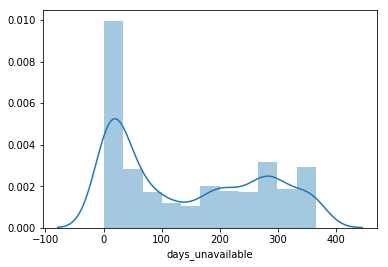

In [8]:
sns.distplot(days_unavailable)

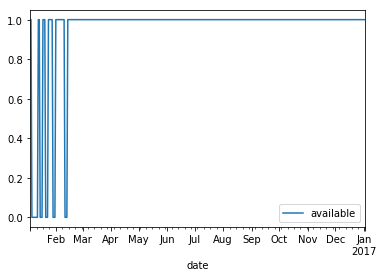

In [9]:
df_seattle_cal['available'] = df_seattle_cal['available'].astype(int)
df_seattle_cal.loc[df_seattle_cal['listing_id']==241032].plot(x='date', y='available', kind='line')

In [10]:
df_seattle_cal.dtypes

listing_id             int64
date          datetime64[ns]
available              int32
price                float64
dtype: object

In [11]:
date_grouped = df_seattle_cal.groupby(by=['date', 'available']).count()


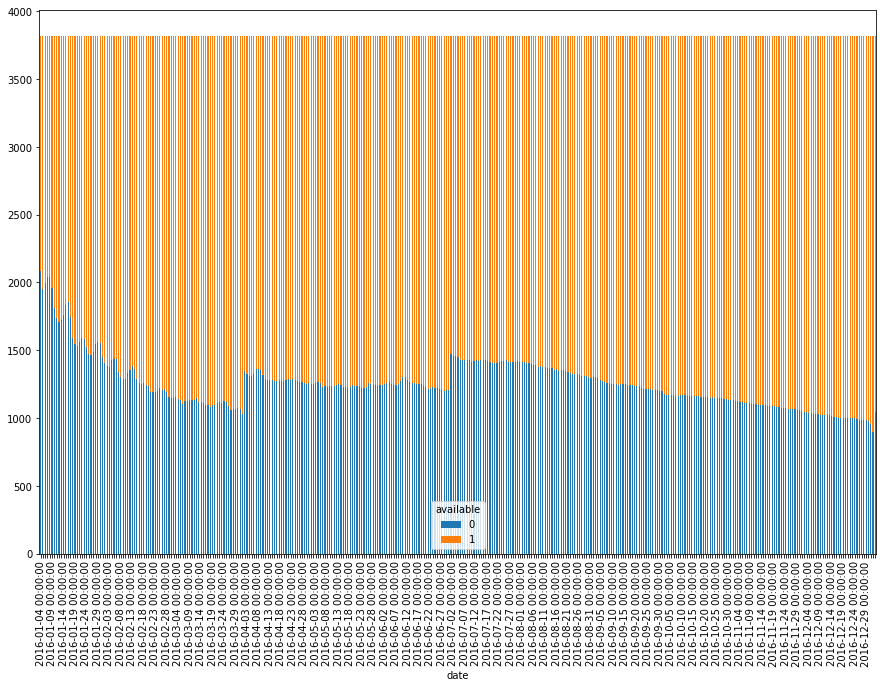

In [12]:
ax = date_grouped.unstack()['listing_id'].plot(kind='bar', figsize=(15,10), stacked=True)
for label in ax.xaxis.get_ticklabels()[::]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::5]:
    label.set_visible(True)

In [13]:
df_seattle_cal['price_index'] = 1
for id_ in df_seattle_cal['listing_id'].unique():
    sub_df = df_seattle_cal.loc[df_seattle_cal['listing_id']==id_,['price', 'listing_id']]
    df_seattle_cal.loc[df_seattle_cal['listing_id']==id_, 'price_index'] = sub_df['price']/sub_df['price'].mean()

In [14]:
mean_index = df_seattle_cal.groupby('date').mean()
mean_index
std_index = df_seattle_cal.groupby('date').std()
std_index
mean_index

,listing_id,available,price,price_index
date,,,,
2016-01-04,5.550111e+06,0.454426,122.085879,0.899178
2016-01-05,5.550111e+06,0.488999,120.681307,0.900973
2016-01-06,5.550111e+06,0.478261,120.928258,0.905073
2016-01-07,5.550111e+06,0.465165,120.958896,0.913565
2016-01-08,5.550111e+06,0.466737,127.640853,0.959488
2016-01-09,5.550111e+06,0.486118,127.330819,0.961799
2016-01-10,5.550111e+06,0.526192,120.001991,0.910499
2016-01-11,5.550111e+06,0.544788,118.988942,0.900765
2016-01-12,5.550111e+06,0.553693,118.720908,0.897220


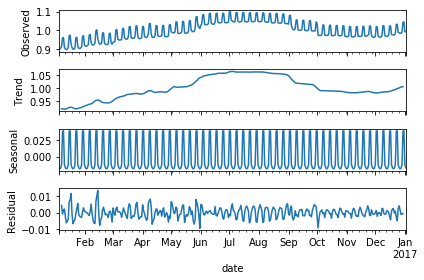

In [128]:
result = sm.tsa.seasonal_decompose(mean_index['price_index'])
result.plot();
plt.savefig('Season.png')

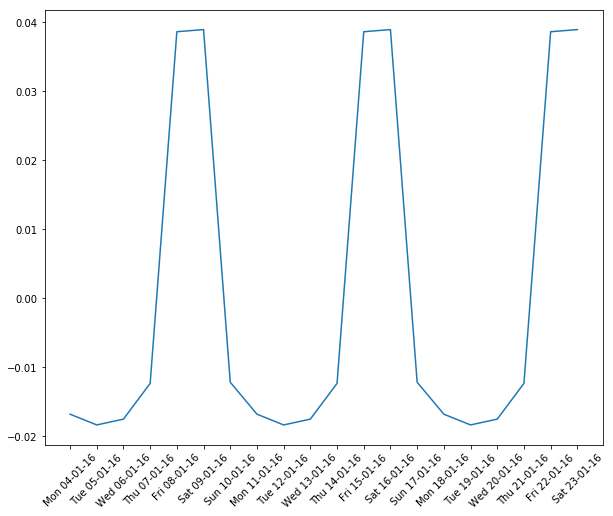

In [16]:

fig, ax = plt.subplots(1,1, figsize=(10,8))
dates = result.seasonal.index
days = dates.day_name()
days
ax.plot(dates[:20], result.seasonal.values[:20])
# Set major x ticks on Mondays.

ax.set_xticklabels(ax.get_xticks(),rotation=45)
ax.xaxis.set_major_locator(
    matplotlib.dates.DayLocator()
)
ax.xaxis.set_major_formatter(
    matplotlib.dates.DateFormatter('%a %d-%m-%y')
)

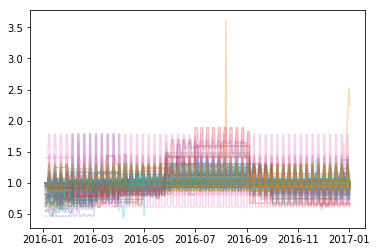

In [17]:
fig, ax = plt.subplots()
ax.fill_between(std_index.index, 
                std_index['price_index']+result.trend, 
                -std_index['price_index']+result.trend,
               alpha=0.5)
ax.plot(result.trend)
for li in df_seattle_cal['listing_id'].unique()[::16]:
    ax.plot(df_seattle_cal.loc[df_seattle_cal['listing_id']==li,'date'], df_seattle_cal.loc[df_seattle_cal['listing_id']==li,'price_index'], alpha=0.3)


In [18]:
# n=7
# for i in np.arange(n,365,n):
# fig, ax = plt.subplots(1,1)

# sns.violinplot(x='date', y='price_index', 
#    data=df_seattle_cal[df_seattle_cal['date'].isin(df_seattle_cal['date'].unique()[i-n:i])], 
#    figsize=(10,8), ax=ax, cut=0)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# ax.set_ylim(0.8,1.3)
# plt.clf()

In [19]:
df_seattle_cal['month'] = df_seattle_cal['date'].apply(lambda x: x.strftime("%B"))
df_seattle_cal['month_num'] = df_seattle_cal['date'].apply(lambda x: x.month)
df_seattle_cal['week_num'] = df_seattle_cal['date'].apply(lambda x: x.strftime('%W'))
df_seattle_cal

,listing_id,date,available,price,price_index,month,month_num,week_num
0,241032,2016-01-04,1,85.0,1.0,January,1,01
1,241032,2016-01-05,1,85.0,1.0,January,1,01
2,241032,2016-01-06,0,NaN,NaN,January,1,01
3,241032,2016-01-07,0,NaN,NaN,January,1,01
4,241032,2016-01-08,0,NaN,NaN,January,1,01
5,241032,2016-01-09,0,NaN,NaN,January,1,01
6,241032,2016-01-10,0,NaN,NaN,January,1,01
7,241032,2016-01-11,0,NaN,NaN,January,1,02
8,241032,2016-01-12,0,NaN,NaN,January,1,02
9,241032,2016-01-13,1,85.0,1.0,January,1,02


In [20]:
df_month_mean = df_seattle_cal.groupby(by='month_num').mean()
df_month_median = df_seattle_cal.groupby(by='month_num').median()

In [21]:
df_month_mean

,listing_id,available,price,price_index
month_num,,,,
1,5.550111e+06,0.566937,122.912176,0.929860
2,5.550111e+06,0.662208,124.293927,0.944251
3,5.550111e+06,0.709187,128.644488,0.970144
4,5.550111e+06,0.663847,135.097005,0.988188
5,5.550111e+06,0.675670,139.538183,1.009331
6,5.550111e+06,0.674384,147.473137,1.050916
7,5.550111e+06,0.627097,152.094150,1.062580
8,5.550111e+06,0.645051,150.656594,1.054162
9,5.550111e+06,0.674402,143.255949,1.020131


In [22]:
df_seattle_cal.dropna(subset=['price_index'])

,listing_id,date,available,price,price_index,month,month_num,week_num
0,241032,2016-01-04,1,85.0,1.0,January,1,01
1,241032,2016-01-05,1,85.0,1.0,January,1,01
9,241032,2016-01-13,1,85.0,1.0,January,1,02
10,241032,2016-01-14,1,85.0,1.0,January,1,02
14,241032,2016-01-18,1,85.0,1.0,January,1,03
15,241032,2016-01-19,1,85.0,1.0,January,1,03
16,241032,2016-01-20,1,85.0,1.0,January,1,03
20,241032,2016-01-24,1,85.0,1.0,January,1,03
21,241032,2016-01-25,1,85.0,1.0,January,1,04
22,241032,2016-01-26,1,85.0,1.0,January,1,04


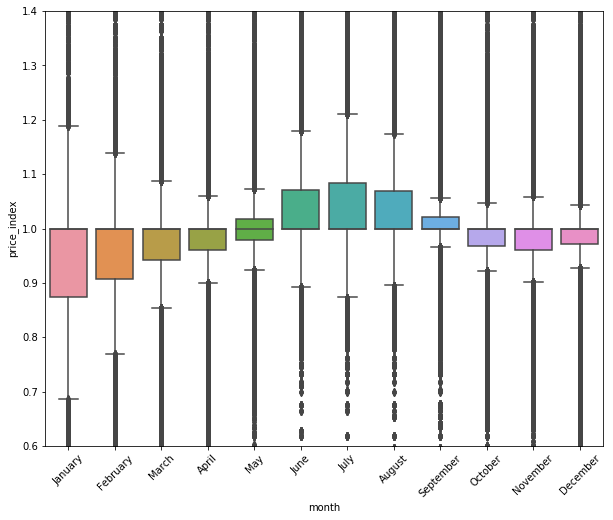

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

sns.boxplot(x='month', y='price_index', data= df_seattle_cal.dropna(subset=['price_index']), ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.ylim(0.6, 1.4)
plt.savefig('Monthly_price_index.png')

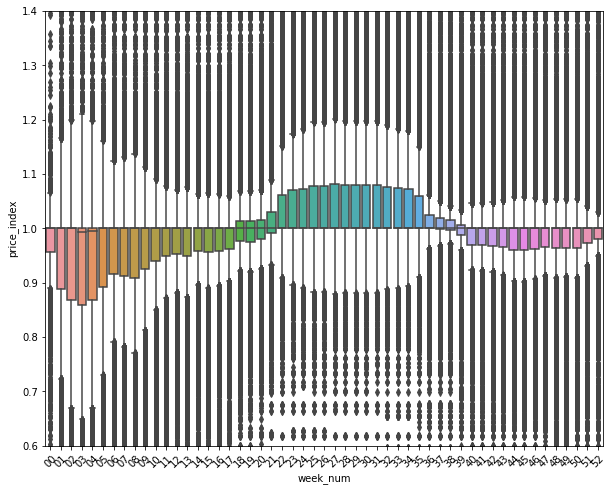

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

sns.boxplot(x='week_num', y='price_index', data= df_seattle_cal.dropna(subset=['price_index']), ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.ylim(0.6, 1.4)
plt.savefig('Weekly_price_index.png')

(0, 2)

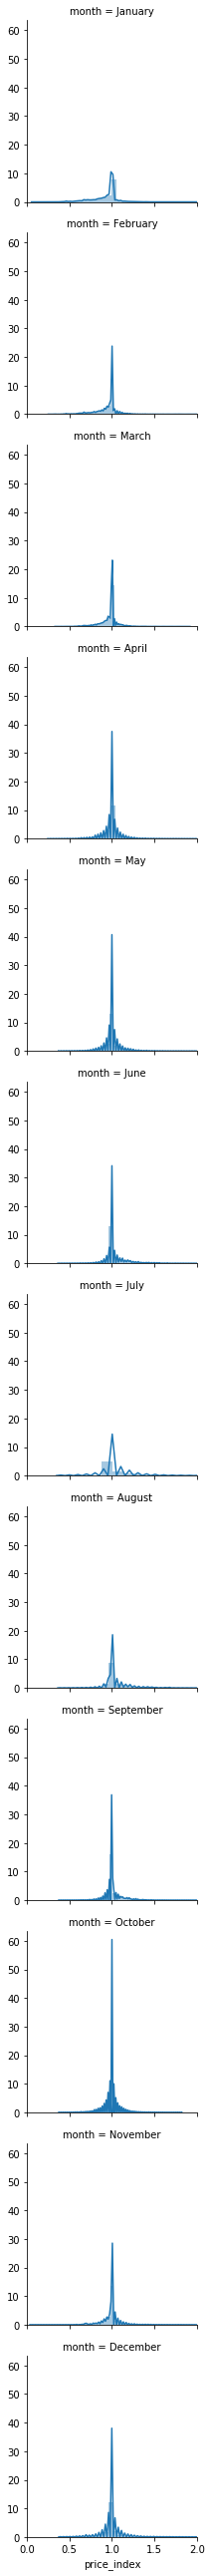

In [25]:
g = sns.FacetGrid(data=df_seattle_cal.dropna(subset=['price_index']), row='month')
g.map(sns.distplot, 'price_index')
plt.xlim(0,2)

(0.6, 1.4)

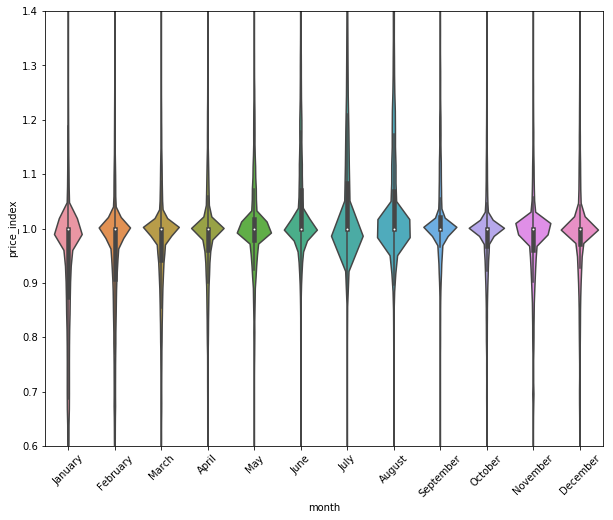

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

sns.violinplot(x='month', y='price_index', data= df_seattle_cal.dropna(subset=['price_index']), ax = ax, scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.ylim(0.6, 1.4)

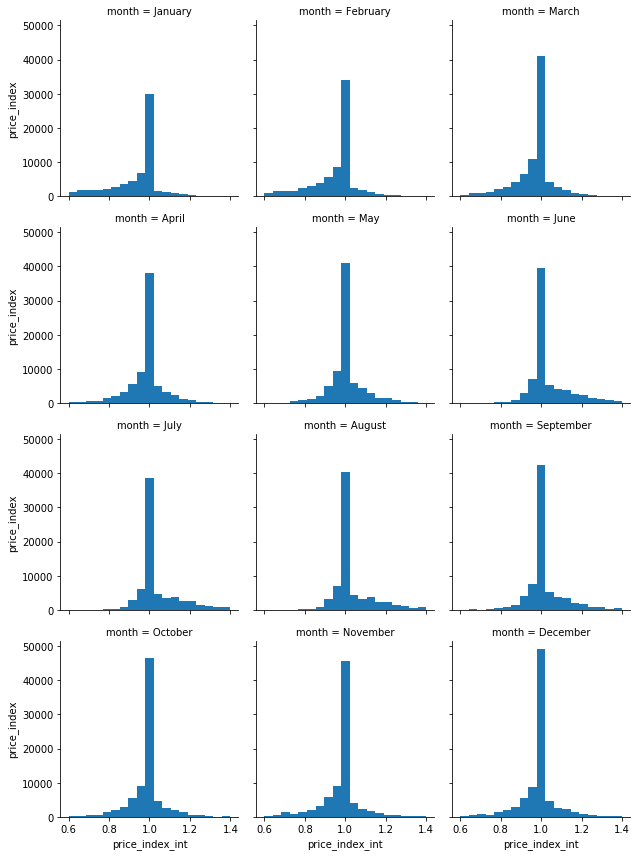

In [127]:
bins = 70

df_int = df_seattle_cal.copy()
df_int['price_index_interval'] = pd.cut(df_seattle_cal['price_index'], np.linspace(0.6, 1.4, 20))
grouped = df_int.groupby(by=['month', 'price_index_interval']).count().reset_index()
grouped['price_index_int'] = grouped['price_index_interval'].apply(lambda x: x.mid)
g=sns.FacetGrid(grouped, col='month', col_wrap=3, col_order=df_int[['month', 'month_num']].groupby('month').mean().sort_values(by='month_num').reset_index()['month'])
g.map(plt.bar, 'price_index_int', 'price_index', width=df_int['price_index_interval'].unique()[0].length)
plt.savefig('Monthly price index count.png')
